# Introduction to this python notebook

In [ ]:
"""
What? Feature importances with forest of trees
"""

# Import python modules

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from pylab import rcParams
from matplotlib import pyplot

# Create a synthetic dataset

In [ ]:
"""
Build a classification task using 3 informative features
"""

In [3]:
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build model

In [4]:
# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)

ExtraTreesClassifier(n_estimators=250, random_state=0)

# Extract feture importance

In [ ]:
"""
The impurity-based feature importances. The higher, the more important the feature. The importance of a feature 
is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as 
the Gini importance.

WARNING: Impurity-based feature importances can be misleading for high cardinality features (many unique values). 
See sklearn.inspection.permutation_importance as an alternative. 
"""

In [5]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


# Plot the ranked feature importances

In [ ]:
"""
This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the impurity-based feature importances of the forest, along with their inter-trees 
variability.
"""

No handles with labels found to put in legend.


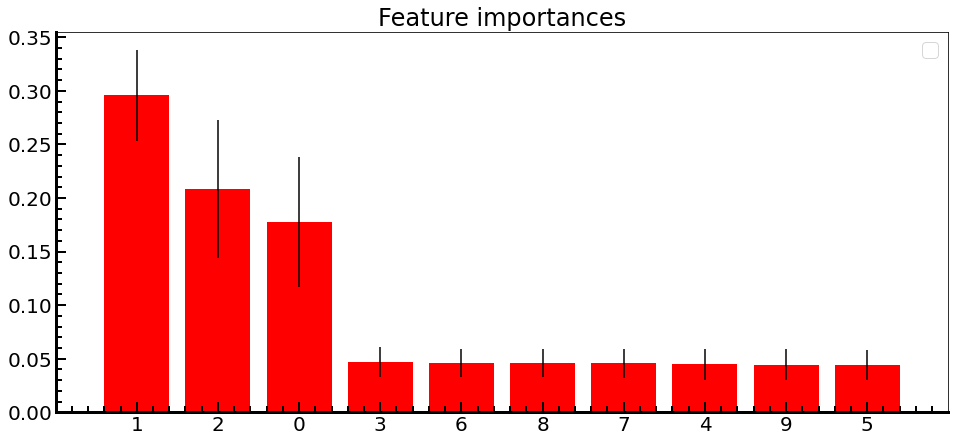

In [13]:
rcParams['figure.figsize'] = 16, 7
rcParams['font.size'] = 20

fig, ax = pyplot.subplots()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

#ax.grid(which = "major", linestyle='-', linewidth='1.0', color='k')
#ax.grid(which = "minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.minorticks_on()
ax.legend()
pyplot.show()
plt.show()